# Relative correlation length
It is sometimes desivable to have a correlation length that is not uniform in space.      
In this notebook we explain how to derive a relative correlation length based on the topography gradients.

In [1]:
using DIVAnd
using Makie, CairoMakie, GeoMakie
using Statistics
include("../config.jl")

"https://dox.uliege.be/index.php/s/h8d3pyqmuea6J9H/download"

In [7]:
dx = dy = 0.1
lonr = 2.5:dx:12.
latr = 42.3:dy:44.6
depthr = [0., 10., 20.]

3-element Vector{Float64}:
  0.0
 10.0
 20.0

Download bathymetry if necessary

In [8]:
bathname = gebco04file
download_check(gebco04file, gebco04fileURL)
bathisglobal = true;

[ Info: File already downloaded


Read bathymetry and create mask

In [9]:
bx,by,b = DIVAnd.load_bath(bathname,true,lonr,latr)
xmask,ymask,mmask = load_mask(bathname,true,lonr,latr,depthr);
b[b .< 0] .= 0;

Simple plot to show the mask

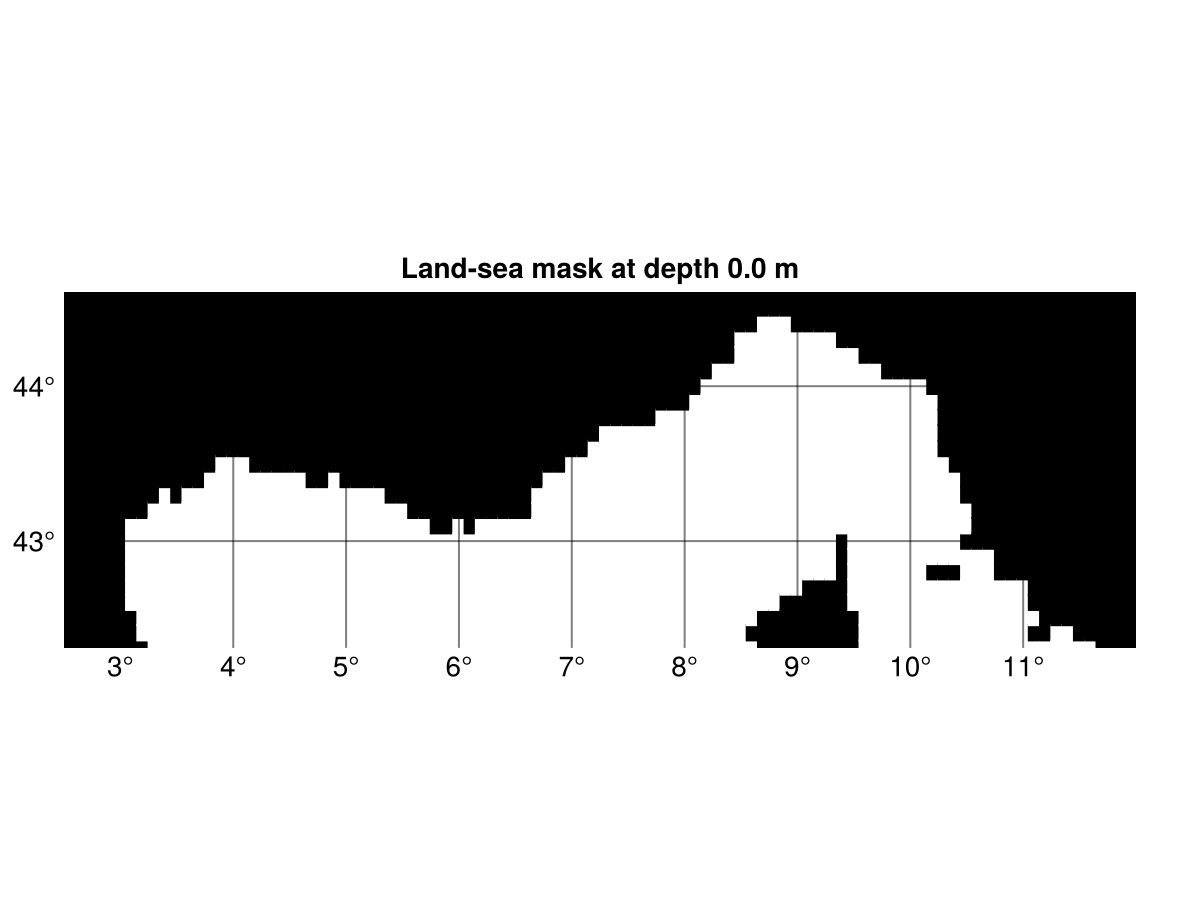

In [12]:
plot_mask(bx, by, mmask[:,:,1], depth=depthr[1])

## Analysis
### Parameter setting
Prepare the grid and the metrics

In [13]:
x,y = DIVAnd.ndgrid(bx,by);
pm,pn = DIVAnd.DIVAnd_metric(x,y);

Set the overal correlation length $L$ and compute the relative correlation length over the domain, based on the topography gradient.

In [14]:
L = 10_000 # meters
RL = DIVAnd.lengraddepth((pm,pn),b, L);

The following figure show that the correlation length is lower near the coast, where the strongest gradients appear.

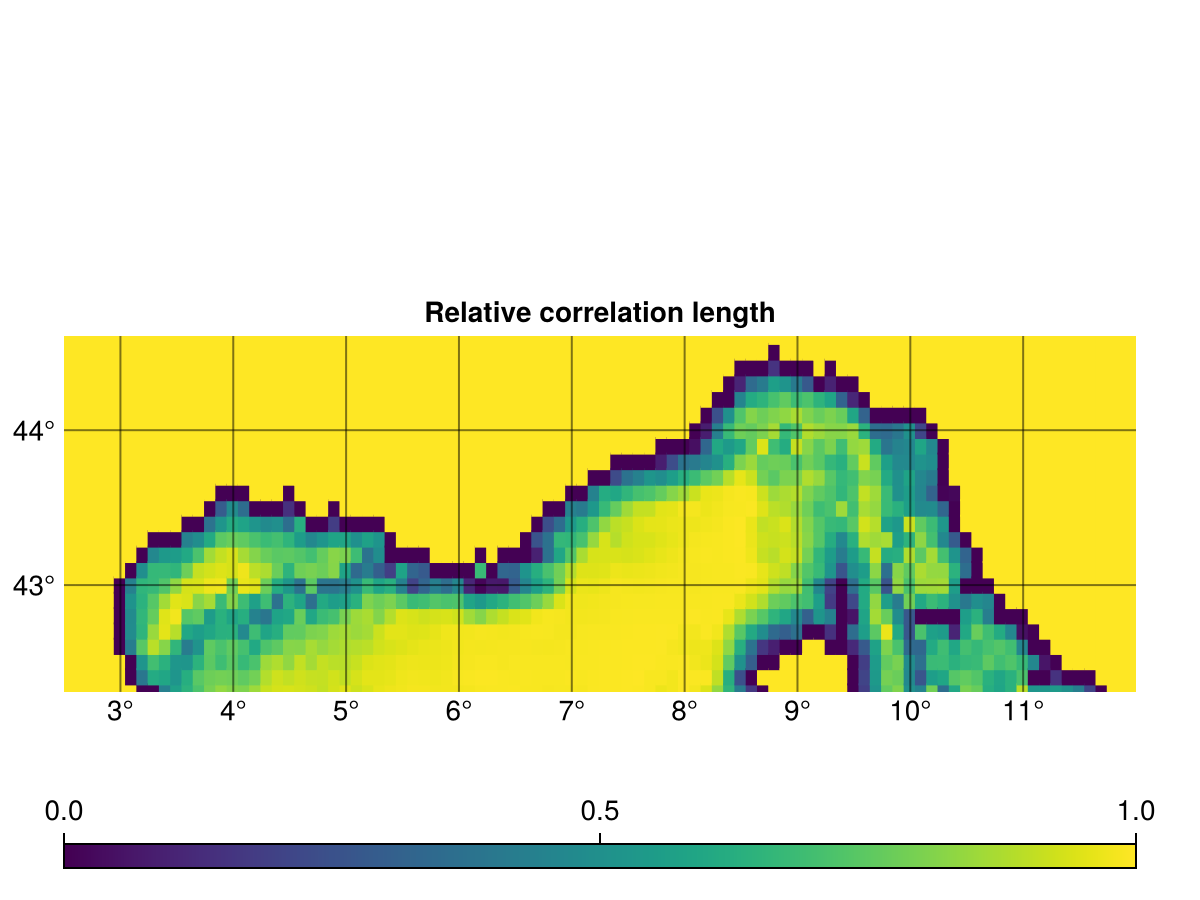

In [30]:
fig = Figure()
ga = GeoAxis(fig[1,1];  dest = "+proj=merc", title = "Relative correlation length", 
    xticks=2.:1.:14, yticks=42.:1.:45.)
heatmap!(ga, bx, by, RL, interpolate = false)
xlims!(lonr[1], lonr[end])
ylims!(latr[1], latr[end])
Colorbar(fig[2,1], vertical=false)
rowgap!(fig.layout, -80)
fig

The RL field is repeated for the different depth levels.

In [31]:
RL3D = repeat(RL, inner=(1,1,length(depthr)))
@show size(RL3D)

size(RL3D) = (96, 24, 3)


(96, 24, 3)

Parameter `len` for diva3d is then:

In [32]:
len = (RL3D,RL3D,RL3D);

* If the option `fitcorrlen` is true, internally `diva3d` will multiply the relative correlation length with the result of `fithorzcorr` and `fithvertcorr`. 
* If fitting is not activated, you have to multiply yourself the relative length scales by appropriate values.